# Portfolio 2 
In this portfolio we have to analyise two given datas which are as follows 
 * Training data
 * Testing Data 

both the dataframes are in CSV format and is already seperated so there is no need to split when using the model and make some predictions using linear model and other regression techniques to obtain the desired output. In this we will use many libraries to obtain the output and has been imported first like seaborn, matplotlib etv.Lastly when all the desired output has been ploted we have to do individual analysis and write the conclusion.
 

>Student Name - Aditya Sharma

>Student ID- 46199551

> GitHub Repository link--> [Click here](https://github.com/MQCOMP6200/portfolio-s1-2021-iamadisharma)

In [1]:
#importing different libraries
import pandas as pd
from matplotlib import pyplot as plt
import calendar
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Analysis of the energy consumption by various devices
    This data consist of energy consumption in a house in the given time and date. By using this data we will use various methods such as regression to analyse the data.

In [2]:
#Loading two different datasets for analysis
testing = pd.read_csv('data/testing.csv')
training = pd.read_csv('data/training.csv')

#### Splitting the dates and time to use it further.

In [3]:
training[['Year','Month','Day']] = training.date.str.split("-",expand=True)
training[['Day','Time']] = training.Day.str.split(" ",expand=True)
training[['Hour','Minute','Second']] = training.Time.str.split(":",expand=True)

In [4]:
training.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,NSM,WeekStatus,Day_of_week,Year,Month,Day,Time,Hour,Minute,Second
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,61200,Weekday,Monday,2016,01,11,17:00:00,17,00,00
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,61800,Weekday,Monday,2016,01,11,17:10:00,17,10,00
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,62400,Weekday,Monday,2016,01,11,17:20:00,17,20,00
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,63600,Weekday,Monday,2016,01,11,17:40:00,17,40,00
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,64200,Weekday,Monday,2016,01,11,17:50:00,17,50,00


Variables Names and their meaning


In [5]:
training.shape  #To check the number of rows and columns in the training dataset


(14803, 39)

In [6]:
testing[['Year','Month','Day']] = testing.date.str.split("-",expand=True,)
testing[['Day','Time']] = testing.Day.str.split(" ",expand=True,)
testing[['Hour','Minute','Second']] = testing.Time.str.split(":",expand=True,)


In [7]:
testing.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,NSM,WeekStatus,Day_of_week,Year,Month,Day,Time,Hour,Minute,Second
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,...,63000,Weekday,Monday,2016,01,11,17:30:00,17,30,00
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,...,64800,Weekday,Monday,2016,01,11,18:00:00,18,00,00
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,...,67200,Weekday,Monday,2016,01,11,18:40:00,18,40,00
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,...,67800,Weekday,Monday,2016,01,11,18:50:00,18,50,00
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,...,70200,Weekday,Monday,2016,01,11,19:30:00,19,30,00


In [8]:
testing.shape   #to check the number of rows and columns in the testing dataset

(4932, 39)

Setting Types in the Day and Date Format as interger and creating a new column named month

In [9]:
training = training.astype({'Year': 'int', 'Month': 'int','Day': 'int','Hour': 'int','Minute': 'int','Second': 'int'})
training['month'] = training['Month'].apply(lambda x: calendar.month_abbr[x])

In [10]:
training.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,WeekStatus,Day_of_week,Year,Month,Day,Time,Hour,Minute,Second,month
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,Weekday,Monday,2016,1,11,17:00:00,17,0,0,Jan
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,Weekday,Monday,2016,1,11,17:10:00,17,10,0,Jan
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,Weekday,Monday,2016,1,11,17:20:00,17,20,0,Jan
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,Weekday,Monday,2016,1,11,17:40:00,17,40,0,Jan
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,Weekday,Monday,2016,1,11,17:50:00,17,50,0,Jan


In [11]:
##training.drop(['Month'], axis=1)

###### Plotting for the analysis of both the dataframes.

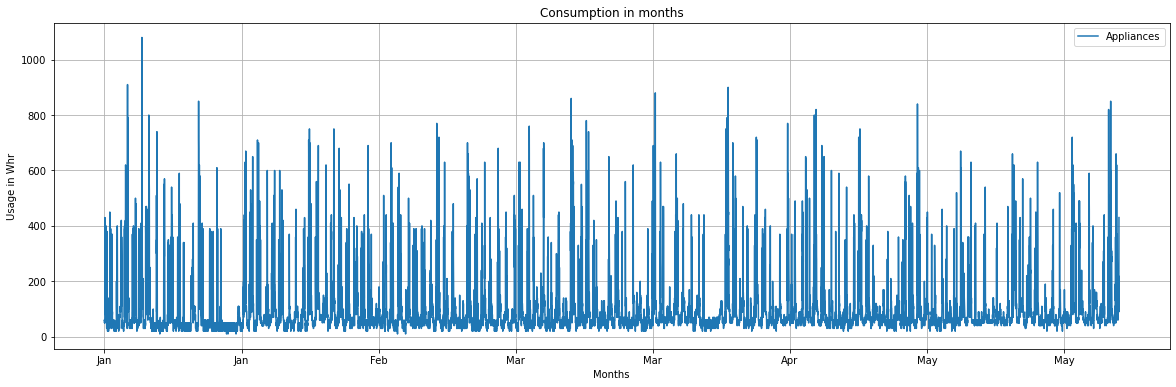

In [12]:
training.plot(x='month', y='Appliances',figsize=(20,6))
plt.xlabel("Months")
plt.ylabel("Usage in Whr")
plt.title("Consumption in months")
plt.grid()

The above graph shows the usage in differnet months of the year.

In [13]:
training['Date'] = training['Year'].map(str) + '-' + training['Month'].map(str) + '-' + training['Day'].map(str)
new_training = training.set_index('Date')

In [14]:
new_training.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,WeekStatus,Day_of_week,Year,Month,Day,Time,Hour,Minute,Second,month
Date,,,,,,,,,,,,,,,,,,,,,
2016-1-11,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,Weekday,Monday,2016,1,11,17:00:00,17,0,0,Jan
2016-1-11,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,Weekday,Monday,2016,1,11,17:10:00,17,10,0,Jan
2016-1-11,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,Weekday,Monday,2016,1,11,17:20:00,17,20,0,Jan
2016-1-11,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,Weekday,Monday,2016,1,11,17:40:00,17,40,0,Jan
2016-1-11,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,Weekday,Monday,2016,1,11,17:50:00,17,50,0,Jan


In [15]:
date_str ='2016-01-11'
date_obj = datetime.strptime(date_str, '%Y-%m-%d')
start_of_week = date_obj - timedelta(days=date_obj.weekday())  # Monday of the first week 
end_of_week = start_of_week + timedelta(days=6)  # Sunday of the first week 
print(start_of_week)
print(end_of_week)

2016-01-11 00:00:00
2016-01-17 00:00:00


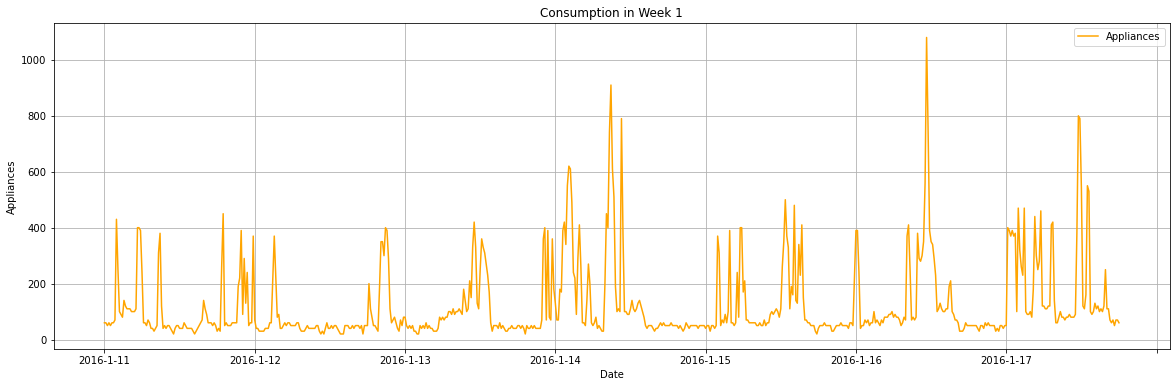

In [16]:
first_week = new_training.loc['2016-1-11':'2016-1-17']
first_week.plot(color="orange", y="Appliances",figsize=(20,6))
plt.xlabel("Date")
plt.ylabel("Appliances")
plt.title("Consumption in Week 1")
plt.grid()

`Observations`
1. As it can be seen in the above plot there is a spike on the 6th day and peaked above 1000 value and is followed by 4th date where there are more than one peak.

In [17]:
appliances =training["Appliances"]

Text(0.5, 1.0, 'Consumption of appliance vs frequency')

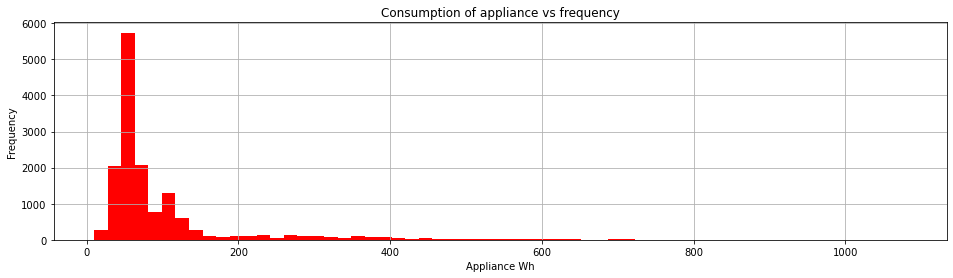

In [18]:
plt.figure(figsize=(16,4))
appliances.hist(histtype = "stepfilled", bins=60 ,color= "red")
plt.xlabel("Appliance Wh")
plt.ylabel("Frequency")
plt.title("Consumption of appliance vs frequency")

`Observations`
1. The above graph show us the frequency of the usage of appliances,its also shows that most of the appliances have range from 40 to 100.The rest of the electrical appliances contributes very low to the total appliances usage. 

Text(0.5, 0, 'Appliance Wh')

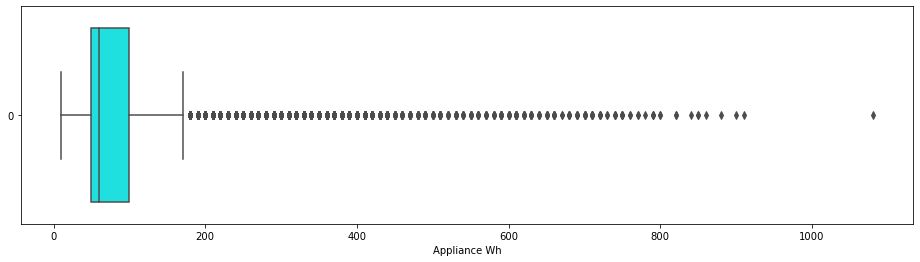

In [19]:
plt.figure(figsize=(16,4))
sns.boxplot(data=appliances,orient="horizontal" ,color= "cyan")
plt.xlabel("Appliance Wh")

`Observations`
1. It has been observed from the above box plot that it contains many outliers and is right skewed.
2. This also shows the usage of appliances which has a range of nearly 40 to 100Wh.


Creating new dataset for selected columns only and checking the correrelation between these values

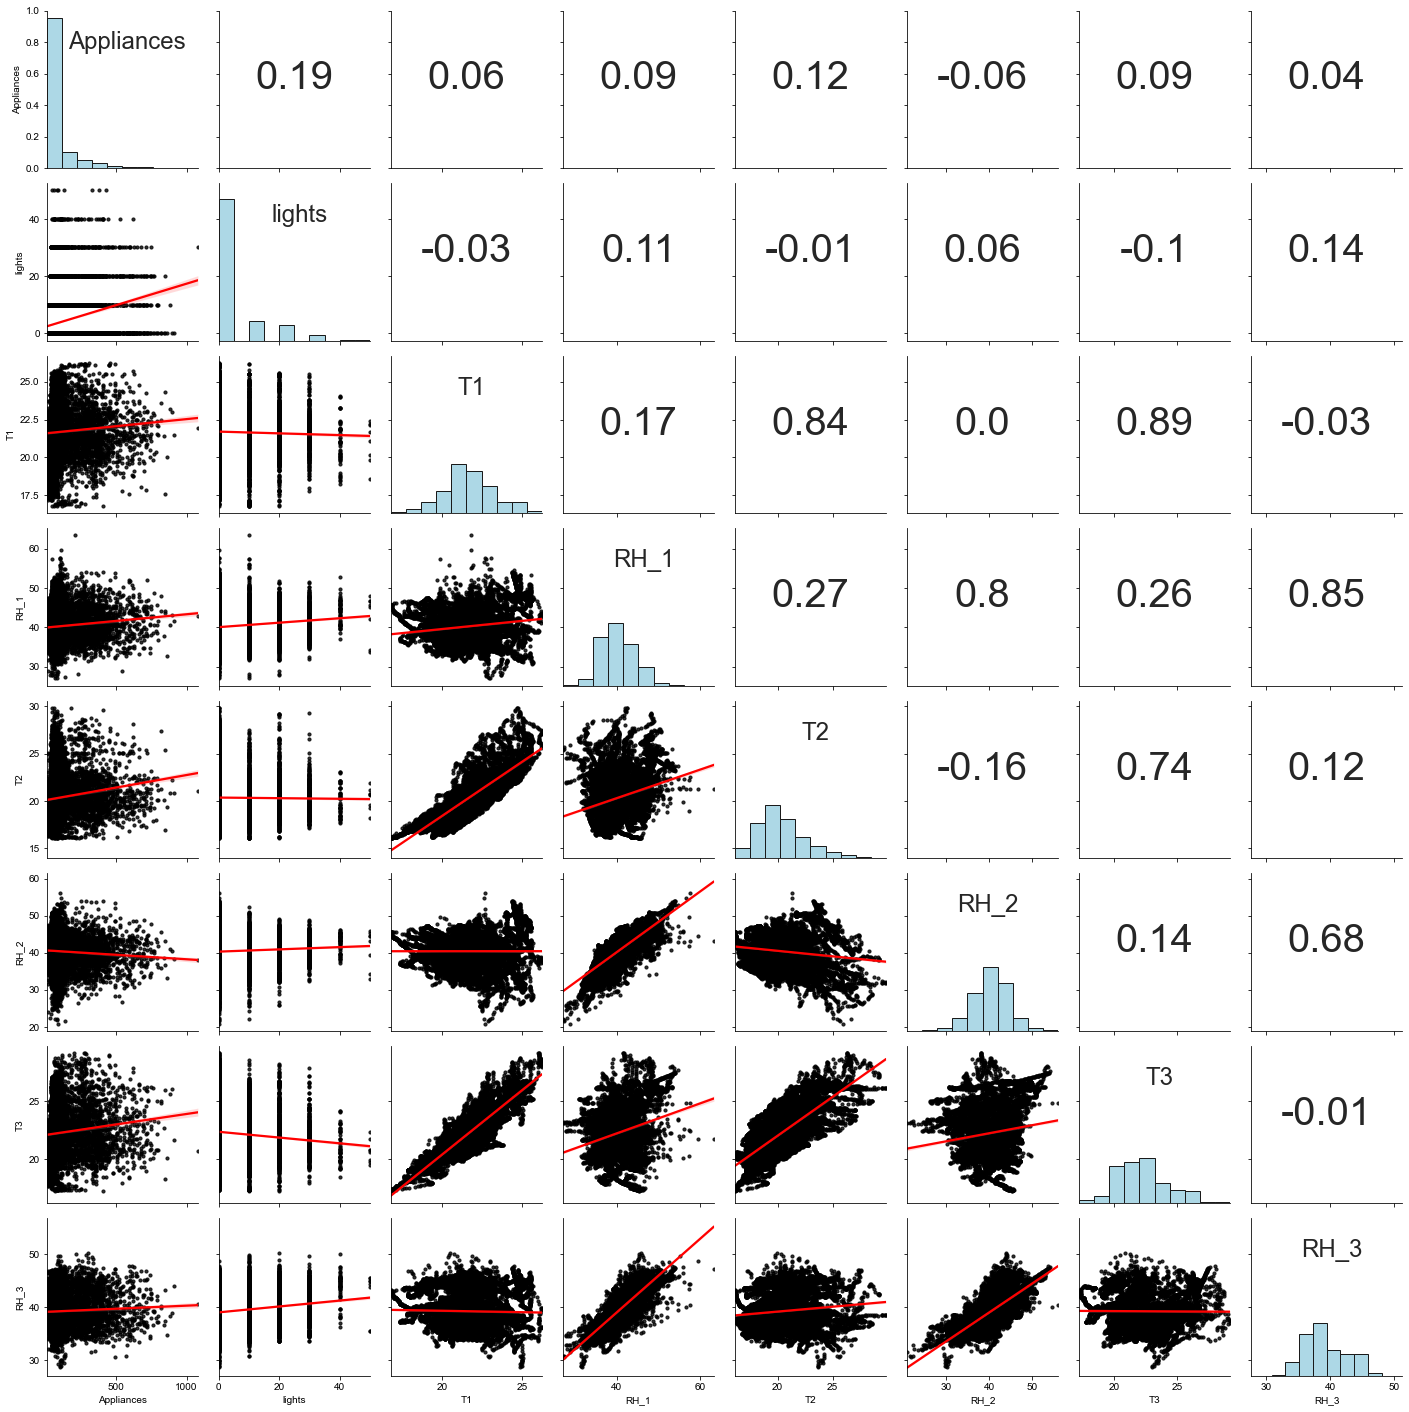

In [20]:
newdf1 = training[['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3']]
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # create the label
    label = str(round(coef, 2))
    
    # Adding the label to the plots
    ax = plt.gca()
    ax.annotate(label,xy=(.5,.5),size = 40,ha ='center',xycoords = ax.transAxes)
    
it = iter(list(newdf1.columns))

def diagfunc(*args, **kws):
    sns.set(font_scale = 2)
    plt.gca().annotate(next(it), xy=(.5, .9), xytext=(5,-5), ha="center", va="top", 
                       xycoords=plt.gca().transAxes, textcoords="offset points")
    # Create a pair grid instance
grid = sns.PairGrid(data=newdf1).map_diag(diagfunc)

# Map the plots to the locations
sns.set(font_scale = 1.2)
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.regplot, color = 'black', scatter_kws ={'s':10},line_kws={"color": "red"})
grid = grid.map_diag(plt.hist,bins=10,edgecolor ='k',color = 'lightblue')

#### Relation 
1. There is a strong relation between T1 and T2 of 0.86 
2. Strong relation between T1 and T3 of 0.89
3. Strong relation between RH_1 and RH_3 of 0.85
4. lastly, Between RH_2 and RH_3 of 0.68

## Plotting Heatmaps

### Heatmap between the variables like appliences usage in a day of week vs the hours of the day.

In [21]:
H_data=training.set_index("Date")

In [22]:
H_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,WeekStatus,Day_of_week,Year,Month,Day,Time,Hour,Minute,Second,month
Date,,,,,,,,,,,,,,,,,,,,,
2016-1-11,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,Weekday,Monday,2016,1,11,17:00:00,17,0,0,Jan
2016-1-11,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,Weekday,Monday,2016,1,11,17:10:00,17,10,0,Jan
2016-1-11,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,Weekday,Monday,2016,1,11,17:20:00,17,20,0,Jan
2016-1-11,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,Weekday,Monday,2016,1,11,17:40:00,17,40,0,Jan
2016-1-11,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,Weekday,Monday,2016,1,11,17:50:00,17,50,0,Jan


In [23]:
date_str = '2016-01-18'
date_obj = datetime.strptime(date_str, '%Y-%m-%d')

start_of_week = date_obj - timedelta(days=date_obj.weekday())  # Monday
end_of_week = start_of_week + timedelta(days=6)  # Sunday
print(start_of_week) # Week 1
print(end_of_week)

2016-01-18 00:00:00
2016-01-24 00:00:00


In [24]:
date_str = '2016-01-25'
date_obj = datetime.strptime(date_str, '%Y-%m-%d')

start_of_week = date_obj - timedelta(days=date_obj.weekday())  # Monday
end_of_week = start_of_week + timedelta(days=6)  # Sunday
print(start_of_week) # Week 2
print(end_of_week)

2016-01-25 00:00:00
2016-01-31 00:00:00


In [25]:
date_str = '2016-02-01'
date_obj = datetime.strptime(date_str, '%Y-%m-%d')

start_of_week = date_obj - timedelta(days=date_obj.weekday())  # Monday
end_of_week = start_of_week + timedelta(days=6)  # Sunday
print(start_of_week) # Week 3
print(end_of_week)

2016-02-01 00:00:00
2016-02-07 00:00:00


In [26]:
date_str = '2016-02-09'
date_obj = datetime.strptime(date_str, '%Y-%m-%d')

start_of_week = date_obj - timedelta(days=date_obj.weekday())  # Monday
end_of_week = start_of_week + timedelta(days=6)  # Sunday
print(start_of_week) # Week 4
print(end_of_week)

2016-02-08 00:00:00
2016-02-14 00:00:00


In [27]:
d1 =H_data.loc['2016-1-18':'2016-1-24']
d2 = pd.pivot_table(d1[['Appliances', 'Day_of_week', 'Hour']], index=['Day_of_week', 'Hour'], aggfunc='sum')
d3 =d2.unstack(level=0)
Week1 = d3.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1)

d1 = H_data.loc['2016-1-25':'2016-1-31']
d2 = pd.pivot_table(d1[['Appliances', 'Day_of_week', 'Hour']], index=['Day_of_week', 'Hour'], aggfunc='sum')
d3 = d2.unstack(level=0)
Week2 = d3.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1)

d1 = H_data.loc['2016-2-1':'2016-2-7']
d2 = pd.pivot_table(d1[['Appliances', 'Day_of_week', 'Hour']], index=['Day_of_week', 'Hour'], aggfunc='sum')
d3 = d2.unstack(level=0)
Week3 = d3.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1)

d1 = H_data.loc['2016-2-8':'2016-2-14']
d2 = pd.pivot_table(d1[['Appliances', 'Day_of_week', 'Hour']], index=['Day_of_week', 'Hour'], aggfunc='sum')
d3 = d2.unstack(level=0)
Week4 = d3.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1)

[Text(0.5, 58.5, 'Week1'), Text(31.5, 0.5, 'Hour of the Day')]

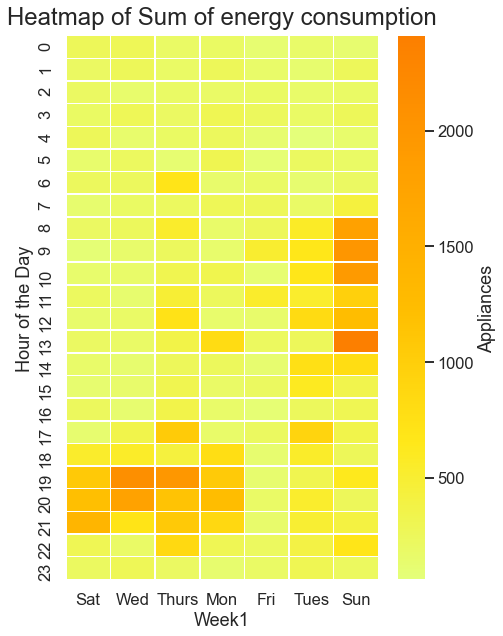

In [28]:
sns.set_context("talk")
test_list = {'Mon','Tues','Wed','Thurs','Fri','Sat','Sun'}
f, ax = plt.subplots(figsize=(7,10))
ax = sns.heatmap(Week1, annot=False, fmt="d", linewidths=.6, ax=ax, xticklabels=test_list,cmap="Wistia",cbar=True,
                 cbar_kws={'label': 'Appliances'})
ax.axes.set_title("Heatmap of Sum of energy consumption", fontsize=24, y=1.01)
ax.set(xlabel='Week1', ylabel='Hour of the Day')



[Text(0.5, 58.5, 'Week1'), Text(31.5, 0.5, 'Hour of the Day')]

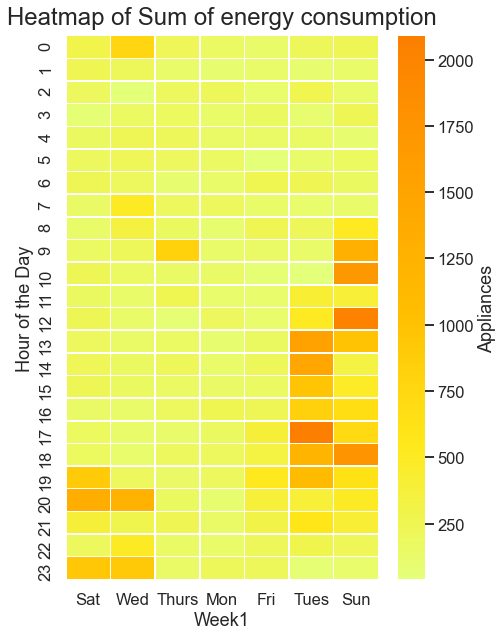

In [29]:
sns.set_context("talk")
test_list = {'Mon','Tues','Wed','Thurs','Fri','Sat','Sun'}
f, ax = plt.subplots(figsize=(7,10))
ax = sns.heatmap(Week2, annot=False, fmt="d", linewidths=.6, ax=ax, xticklabels=test_list,cmap="Wistia",cbar=True,
                 cbar_kws={'label': 'Appliances'})
ax.axes.set_title("Heatmap of Sum of energy consumption", fontsize=24, y=1.01)
ax.set(xlabel='Week1', ylabel='Hour of the Day')


[Text(0.5, 58.5, 'Week1'), Text(31.5, 0.5, 'Hour of the Day')]

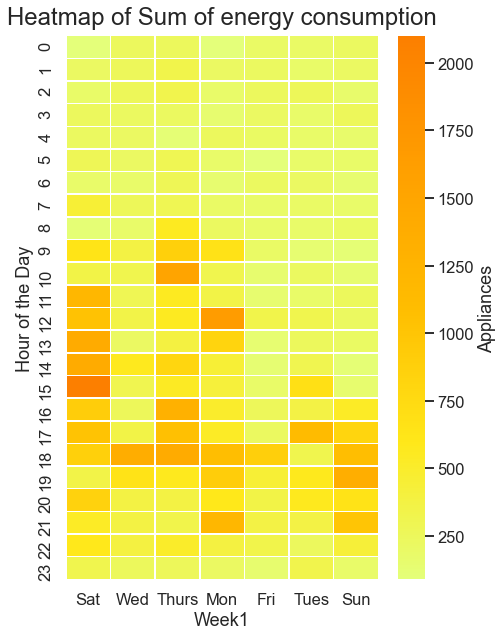

In [30]:
sns.set_context("talk")
test_list = {'Mon','Tues','Wed','Thurs','Fri','Sat','Sun'}
f, ax = plt.subplots(figsize=(7,10))
ax = sns.heatmap(Week3, annot=False, fmt="d", linewidths=.6, ax=ax, xticklabels=test_list,cmap="Wistia",cbar=True,
                 cbar_kws={'label': 'Appliances'})
ax.axes.set_title("Heatmap of Sum of energy consumption", fontsize=24, y=1.01)
ax.set(xlabel='Week1', ylabel='Hour of the Day')


[Text(0.5, 58.5, 'Week1'), Text(31.5, 0.5, 'Hour of the Day')]

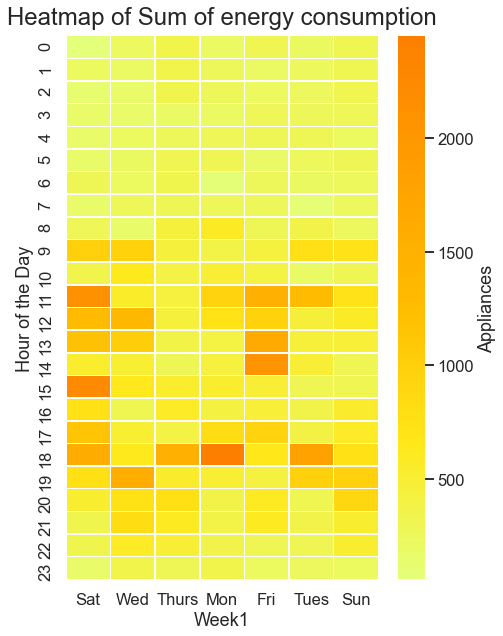

In [31]:
sns.set_context("talk")
test_list = {'Mon','Tues','Wed','Thurs','Fri','Sat','Sun'}
f, ax = plt.subplots(figsize=(7,10))
ax = sns.heatmap(Week4, annot=False, fmt="d", linewidths=.6, ax=ax, xticklabels=test_list,cmap="Wistia",cbar=True,
                 cbar_kws={'label': 'Appliances'})
ax.axes.set_title("Heatmap of Sum of energy consumption", fontsize=24, y=1.01)
ax.set(xlabel='Week1', ylabel='Hour of the Day')



`Observation`
1. From the avove heat maps it is observed that everyday there is normal useage of energy consumption from 0.00hr to 8.00hr.
2. As we move along the day we can see a spike in the energy consumption between 17.00hrs to 22.00hrs.


In [32]:
df1 = testing.drop(["Appliances","date","Year","Month","Day","Time","Hour","Minute","Second"],axis=1)
df2 = testing['Appliances']
df3 = pd.get_dummies(df1["Day_of_week"])
df4 = pd.get_dummies(df1["WeekStatus"])
df5 = pd.concat([df1,df3,df4],axis=1)
df5.drop(["WeekStatus","Day_of_week"],axis=1,inplace=True)
df5.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,NSM,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Weekday,Weekend
0,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,45.723333,17.166667,...,63000,0,1,0,0,0,0,0,1,0
1,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,45.790000,17.100000,...,64800,0,1,0,0,0,0,0,1,0
2,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,46.430000,17.100000,...,67200,0,1,0,0,0,0,0,1,0
3,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,46.430000,17.100000,...,67800,0,1,0,0,0,0,0,1,0
4,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,48.490000,17.150000,...,70200,0,1,0,0,0,0,0,1,0


In [33]:
df5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lights       4932 non-null   int64  
 1   T1           4932 non-null   float64
 2   RH_1         4932 non-null   float64
 3   T2           4932 non-null   float64
 4   RH_2         4932 non-null   float64
 5   T3           4932 non-null   float64
 6   RH_3         4932 non-null   float64
 7   T4           4932 non-null   float64
 8   RH_4         4932 non-null   float64
 9   T5           4932 non-null   float64
 10  RH_5         4932 non-null   float64
 11  T6           4932 non-null   float64
 12  RH_6         4932 non-null   float64
 13  T7           4932 non-null   float64
 14  RH_7         4932 non-null   float64
 15  T8           4932 non-null   float64
 16  RH_8         4932 non-null   float64
 17  T9           4932 non-null   float64
 18  RH_9         4932 non-null   float64
 19  T_out 

In [34]:
df6 = training.drop(["Appliances","date","Year","Month","Day","Time","Hour","Minute","Second","Date"],axis=1)
df7 = training['Appliances']
df8 = pd.get_dummies(df6["Day_of_week"])
df9 = pd.get_dummies(df6["WeekStatus"])
df10 = pd.concat([df6,df8,df9],axis=1)
df10.drop(["WeekStatus","Day_of_week","month"],axis=1,inplace=True)
df10.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,NSM,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Weekday,Weekend
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,61200,0,1,0,0,0,0,0,1,0
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,61800,0,1,0,0,0,0,0,1,0
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,62400,0,1,0,0,0,0,0,1,0
3,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,63600,0,1,0,0,0,0,0,1,0
4,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,...,64200,0,1,0,0,0,0,0,1,0


In [35]:
model = linear_model.LinearRegression()
model.fit(df10,df7)
def mean_absolute_percentage_error(df7, y_train_hat): 
    df7, y_train_hat = np.array(df7), np.array(y_train_hat)
    return np.mean(np.abs((df7 - y_train_hat) / df7)) * 100
y_hat = model.predict(df5)
y_train_hat = model.predict(df10)
print("Testing")
print("RMSE: ",np.sqrt(mean_squared_error(df2,y_hat)))
print("R2 Score: ",r2_score(df2,y_hat))
print("MAE :",mean_absolute_error(df2,y_hat))
print("MAPE% :",mean_absolute_percentage_error(df2,y_hat))
print()
print("Training")
print("RMSE: ",np.sqrt(mean_squared_error(df7,y_train_hat)))
print("R2 Score: ",r2_score(df7,y_train_hat))
print("MAE :",mean_absolute_error(df7,y_train_hat))
print("MAPE% :",mean_absolute_percentage_error(df7,y_train_hat))


Testing
RMSE:  93.17643426587844
R2 Score:  0.1590071277867362
MAE : 51.984929609381375
MAPE% : 59.955125611471935

Training
RMSE:  93.20557248110671
R2 Score:  0.17834376492372517
MAE : 53.13891233505253
MAPE% : 61.331174880920926


In [36]:
estimator = LinearRegression()  ##RMSE Values 
rmse_test_score=[]
for i in range(1,38):
    selector = RFE(estimator,n_features_to_select= i)
    selector.fit(df10,df7)
    df7_pred = selector.predict(df5)
    rmse_test = np.sqrt(mean_squared_error(df2,df7_pred))
    print("RMSE:",i,'we get' ,rmse_test)

    rmse_test_score.append(rmse_test)
print(len(rmse_test_score)) 

RMSE: 1 we get 101.26888895164174
RMSE: 2 we get 99.12399407311729
RMSE: 3 we get 98.92249989546323
RMSE: 4 we get 97.97137950937748
RMSE: 5 we get 97.87877773888789
RMSE: 6 we get 97.79879832642702
RMSE: 7 we get 97.54264516067863
RMSE: 8 we get 97.4383034495254
RMSE: 9 we get 96.97841033120521
RMSE: 10 we get 95.04617607469439
RMSE: 11 we get 95.02193708768031
RMSE: 12 we get 94.9073006369462
RMSE: 13 we get 94.68863860202237
RMSE: 14 we get 94.70687758710378
RMSE: 15 we get 94.68431856934914
RMSE: 16 we get 94.69881903708233
RMSE: 17 we get 94.69881903708233
RMSE: 18 we get 94.69881903708233
RMSE: 19 we get 94.69881903708233
RMSE: 20 we get 94.69255463778536
RMSE: 21 we get 93.36896366298174
RMSE: 22 we get 93.28385154062673
RMSE: 23 we get 93.29369806417367
RMSE: 24 we get 93.30657491899885
RMSE: 25 we get 93.30996326942872
RMSE: 26 we get 93.31573414160862
RMSE: 27 we get 93.3248817812589
RMSE: 28 we get 93.31898731190083
RMSE: 29 we get 93.32222622748658
RMSE: 30 we get 93.335511

In [37]:
est = LinearRegression()
k = StratifiedKFold(n_splits=10,random_state=42)
rfecv = RFECV(est,step=1,cv=k,scoring='neg_mean_squared_error')
rfecv = rfecv.fit(df10,df7)


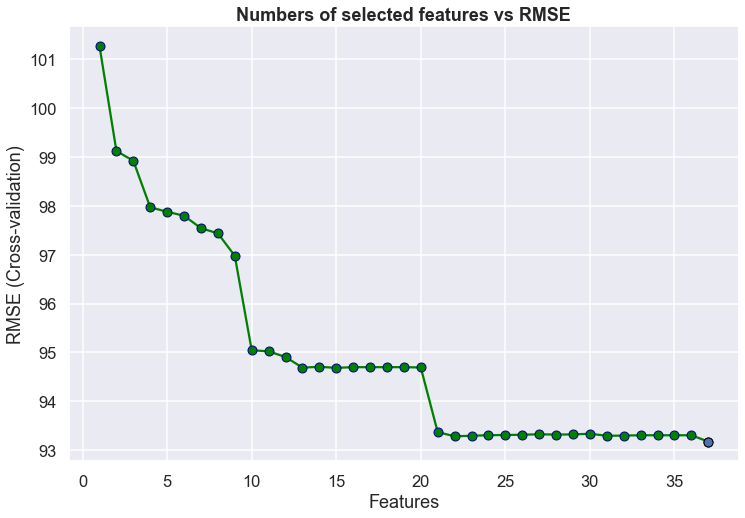

In [39]:
bf = 1
for item in rmse_test_score:
    if item < rmse_test_score[bf - 1]:
        bf = rmse_test_score.index(item) + 1
plt.figure(figsize=(12,8))
plt.grid()
plt.xlabel('Features')
plt.ylabel('RMSE (Cross-validation)')
plt.title('Numbers of selected features vs RMSE',fontsize=18,fontweight='bold')
plt.plot(range(1,38),rmse_test_score,marker='o',color='green',markeredgewidth=1,markeredgecolor='Darkblue')
plt.plot(bf,rmse_test_score[bf -1],marker='o',markeredgecolor='black')
plt.grid()
plt.show()

`Observation`
1. Using mean squared error in the above graph taking the number of features has been obtained as per the requrement.

# Appendix

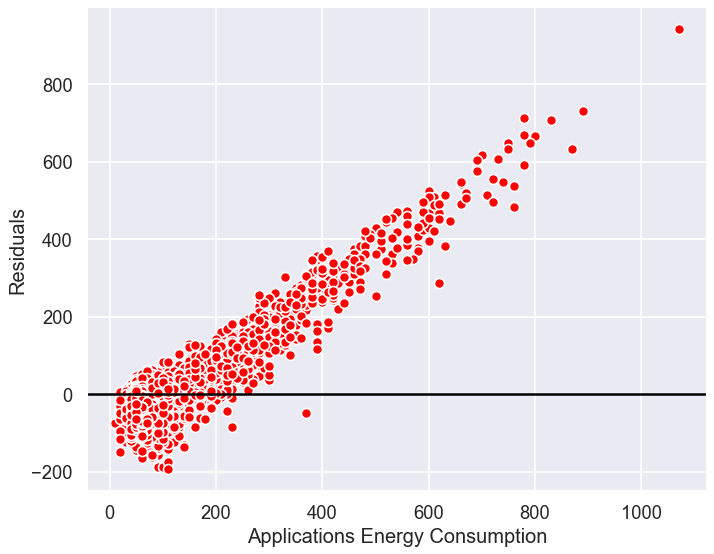

In [40]:
residual = df2.values - y_hat
plt.figure(figsize=(10,8), dpi=80)
plt.scatter(df2,residual,color="red",edgecolor="white")
plt.xlabel('Applications Energy Consumption')
plt.ylabel('Residuals')
plt.axhline(0,color='black')

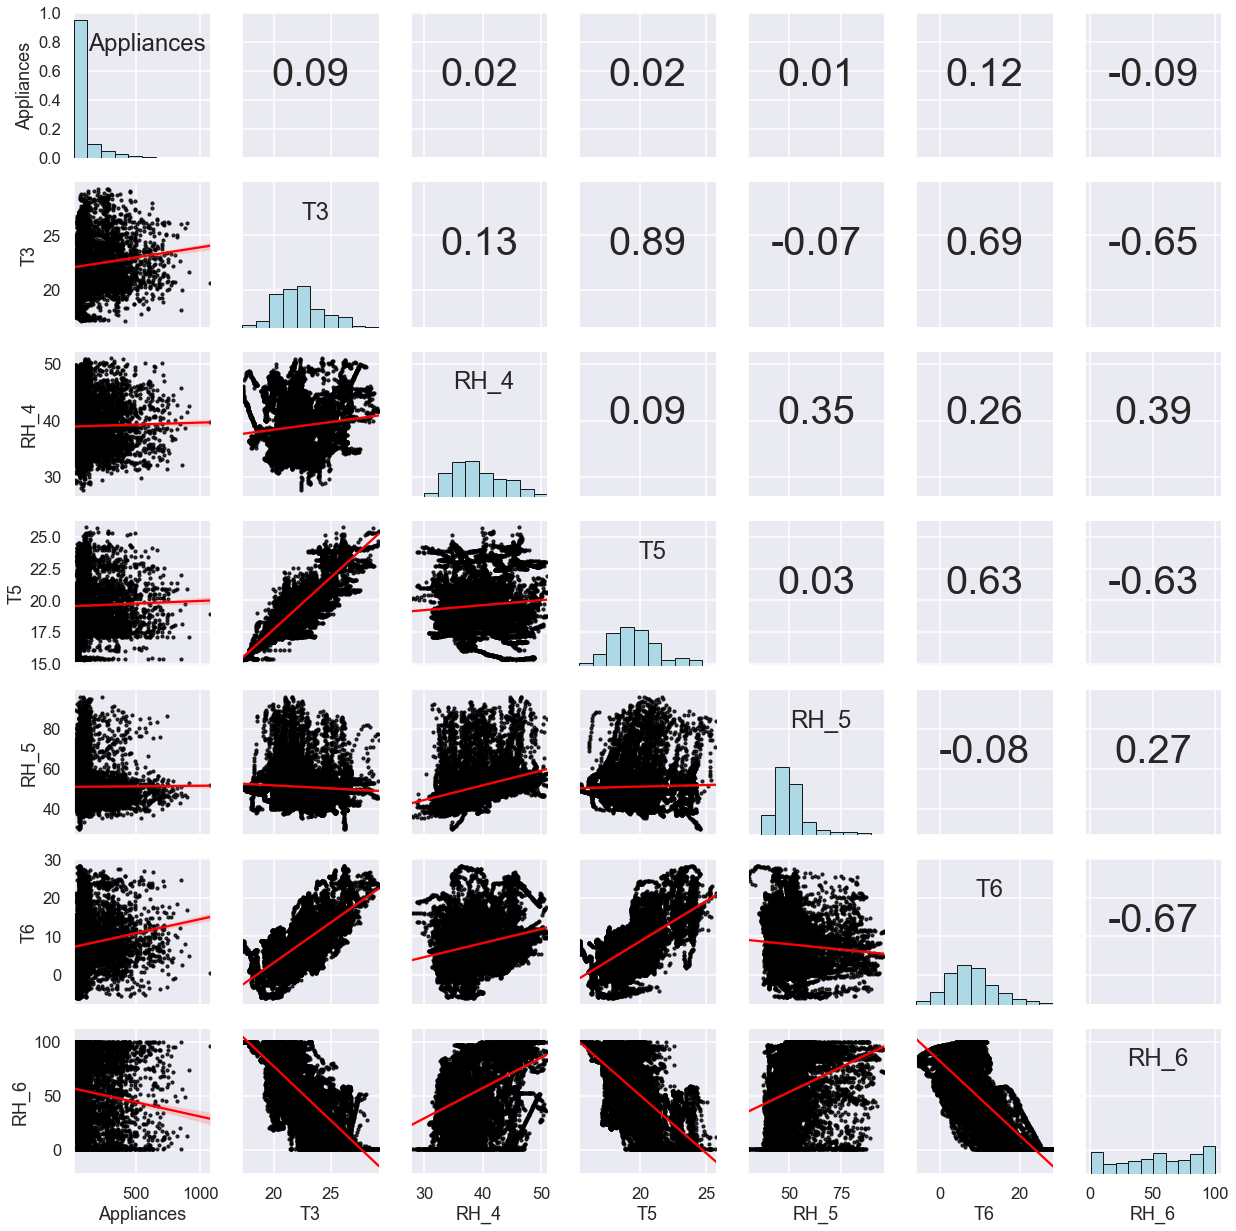

In [41]:
newdf1 = training[['Appliances','T3','RH_4','T5','RH_5','T6','RH_6']]

def corr(x, y, **kwargs):
    

    coef = np.corrcoef(x, y)[0][1]

    label = str(round(coef, 2))
    
    ax = plt.gca()
    
    ax.annotate(label,xy=(.5,.5),size = 40,ha ='center',xycoords = ax.transAxes)
    
it = iter(list(newdf1.columns))

def diagfunc(*args, **kws):
    sns.set(font_scale = 2)
    plt.gca().annotate(next(it), xy=(.5, .9), xytext=(5,-5), ha="center", va="top", 
                       xycoords=plt.gca().transAxes, textcoords="offset points")
    
# Create a pair grid instance
grid = sns.PairGrid(data=newdf1).map_diag(diagfunc)

# Map the plots to the locations
sns.set(font_scale = 1.2)
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.regplot, color = 'black', scatter_kws ={'s':10},line_kws={"color": "red"})
grid = grid.map_diag(plt.hist,bins=10,edgecolor ='k',color = 'lightblue')

#### Relation 
1. There is a strong relation between T3 and T5 of 0.89 
2. Some relation between T3 and T6 of 0.69
3. Some relation between T and RH_6 of -0.68
4. lastly, Between T5  RH_6, T6 of +-0.63

Rest there is no clear relation between any variables

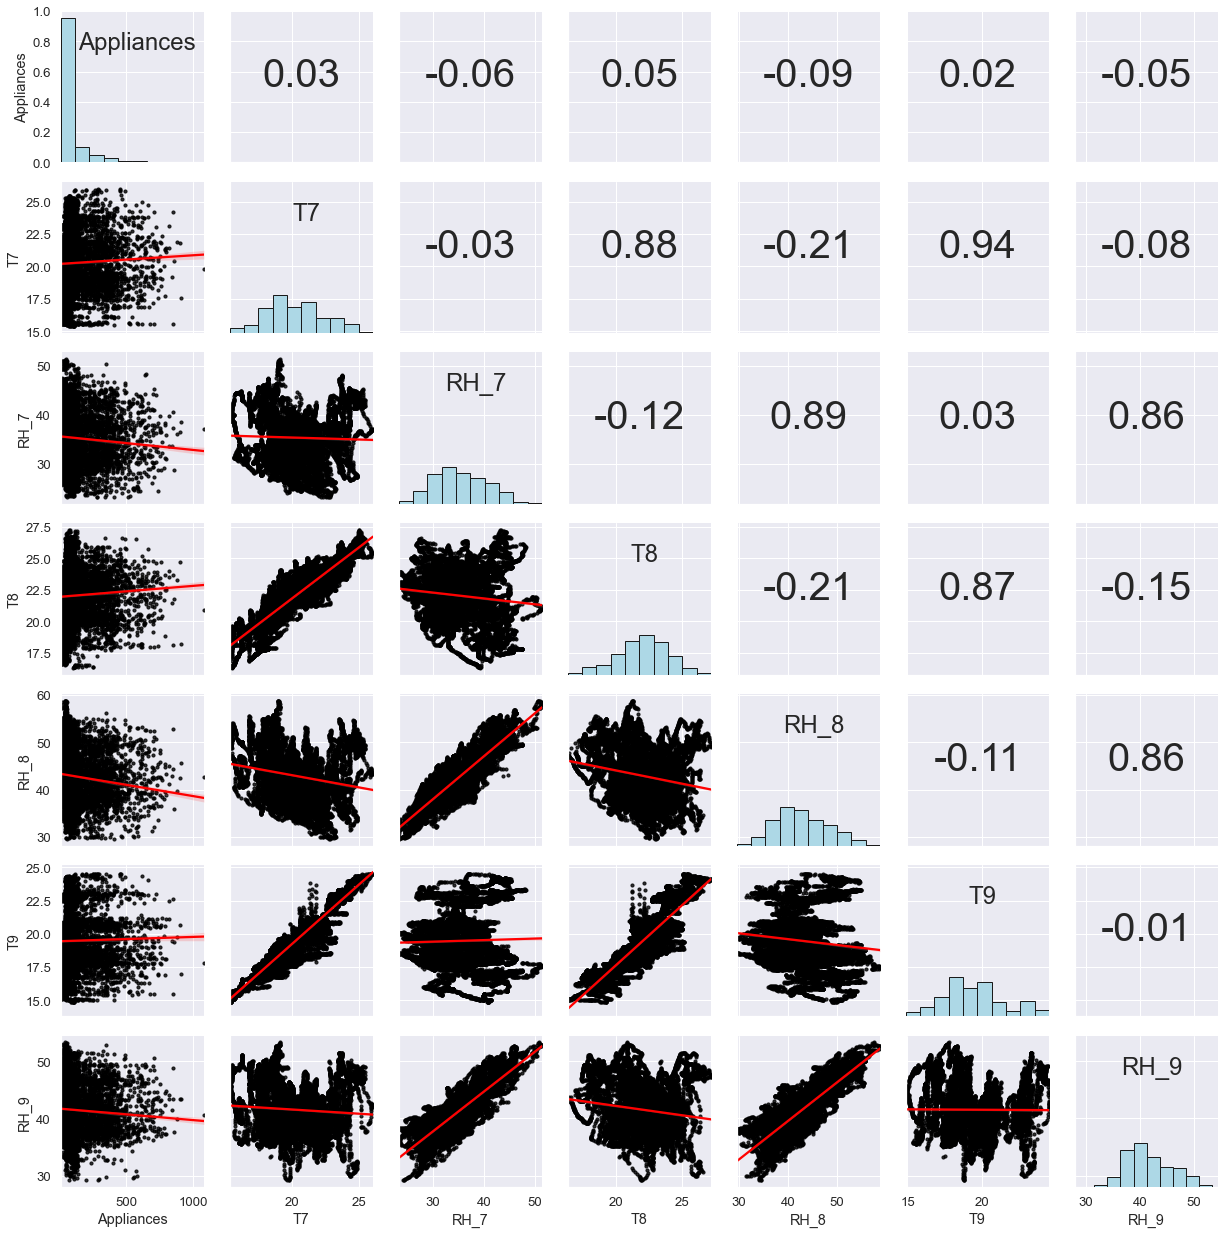

In [42]:
newdf1 = training[['Appliances','T7','RH_7','T8','RH_8','T9','RH_9']]
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # create the label
    label = str(round(coef, 2))
    
    # Adding the label to the plots
    ax = plt.gca()
    ax.annotate(label,xy=(.5,.5),size = 40,ha ='center',xycoords = ax.transAxes)
    
it = iter(list(newdf1.columns))

def diagfunc(*args, **kws):
    sns.set(font_scale = 2)
    plt.gca().annotate(next(it), xy=(.5, .9), xytext=(5,-5), ha="center", va="top", 
                       xycoords=plt.gca().transAxes, textcoords="offset points")
    # Create a pair grid instance
grid = sns.PairGrid(data=newdf1).map_diag(diagfunc)

# Map the plots to the locations
sns.set(font_scale = 1.2)
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.regplot, color = 'black', scatter_kws ={'s':10},line_kws={"color": "red"})
grid = grid.map_diag(plt.hist,bins=10,edgecolor ='k',color = 'lightblue')

#### Relation 
1. There is a strong relation between T7 - T8 ,T9 of 0.88 ,0.94 
2. Strong relation between RH_7 and RH_8 of 0.89
3. Strong relation between T8 and T9 of 0.87
4. lastly, Between RH_8 and RH_9 of 0.86

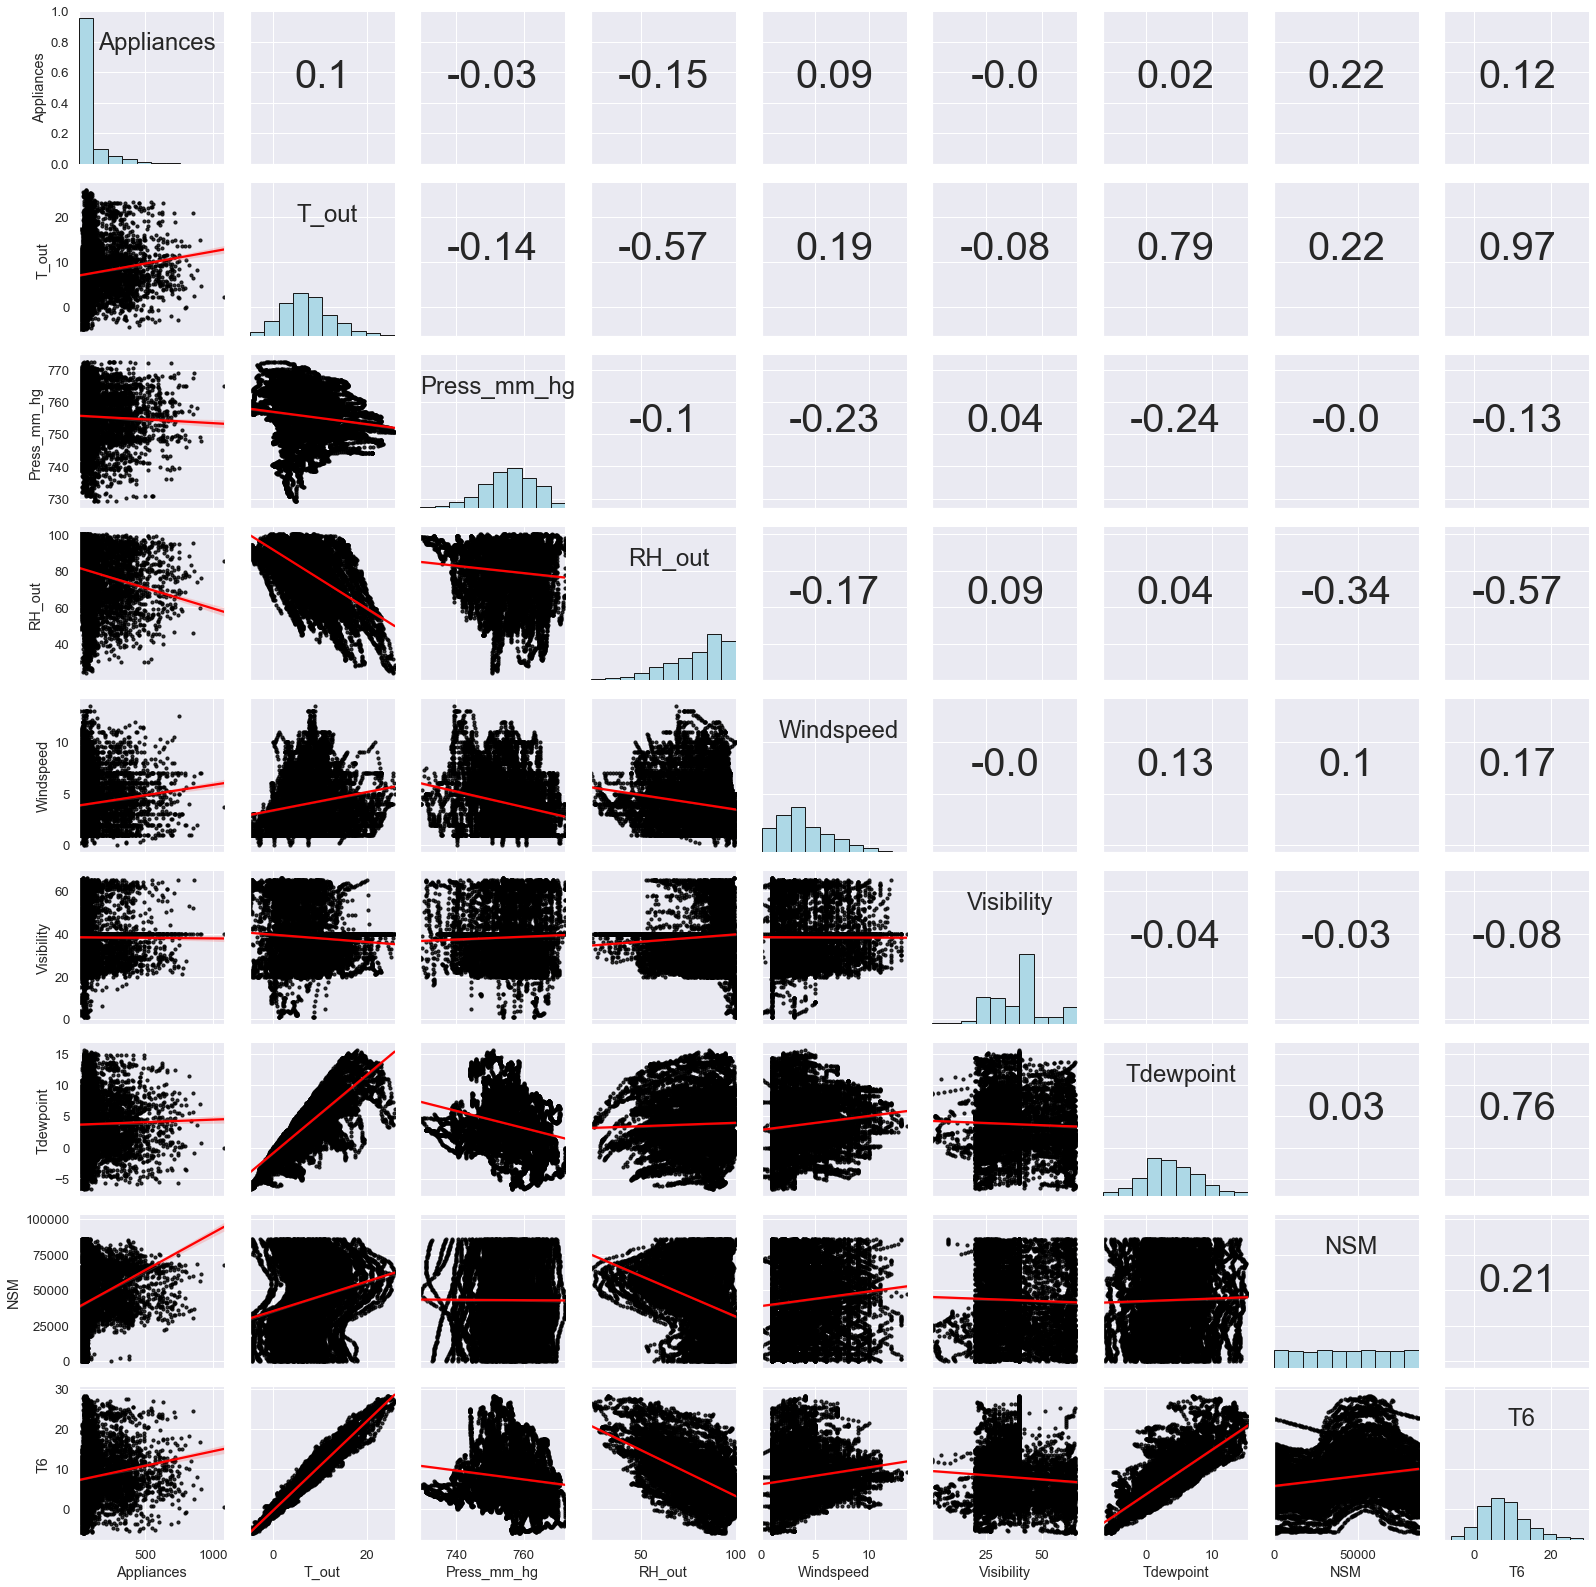

In [43]:
newdf1 = training[['Appliances','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','NSM','T6']]
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # create the label
    label = str(round(coef, 2))
    
    # Adding the label to the plots
    ax = plt.gca()
    ax.annotate(label,xy=(.5,.5),size = 40,ha ='center',xycoords = ax.transAxes)
    
it = iter(list(newdf1.columns))

def diagfunc(*args, **kws):
    sns.set(font_scale = 2)
    plt.gca().annotate(next(it), xy=(.5, .9), xytext=(5,-5), ha="center", va="top", 
                       xycoords=plt.gca().transAxes, textcoords="offset points")
    # Create a pair grid instance
grid = sns.PairGrid(data=newdf1).map_diag(diagfunc)

# Map the plots to the locations
sns.set(font_scale = 1.2)
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.regplot, color = 'black', scatter_kws ={'s':10},line_kws={"color": "red"})
grid = grid.map_diag(plt.hist,bins=10,edgecolor ='k',color = 'lightblue')

#### Relation 
There is no clear relation except
1. Tout With Tdewpoint of 0.79 and T6 of 0.97 
2. Tdewpoint With T6 of 0.76


### Conclusion 
All the requred graphs and output has been obtained from the research paper provided.Analysis has been done for each plot and predction model for the best features has been obtained and finaly extra plots has been provided under the apendix section.